<a href="https://colab.research.google.com/github/cuteAmi/FlightPricePredictRegression/blob/main/FlightPriceTop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir Airline

mkdir: cannot create directory ‘Airline’: File exists


In [ ]:
ls

 Airline/  'C:\Users\amita\Downloads\Airline\Airline\model\model.pickle'


In [ ]:
! unzip /content/Airline

Archive:  /content/Airline.zip
replace Airline/Airline/data/Data_Train.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
cd /content/Airline

/content/Airline


In [ ]:
pwd

'/content/Airline'

In [ ]:
ls

 Airline/  'C:\Users\amita\Downloads\Airline\Airline\model\model.pickle'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%%time
df = pd.read_excel("/content/Airline/Airline/data/Data_Train.xlsx")

CPU times: user 1.9 s, sys: 19.6 ms, total: 1.92 s
Wall time: 1.92 s


# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


EDA question?
1. Which Airline   has the maximum and minimum travel?
2. Which City   has the maximum and minimum departures?
3. Which City   has the maximum and minimum Arrivals?
4. Which month has the maximum / minimum departures?
5. What is the highest & lowest Ticket price range fall in?
6. On which day in a week has the maximum/minimum departure booking?
7. What is the minimum & maximum duration of the travel?
8. Month wise Revenue Maximum & minimum?
9. On which day of Week Revenue Maximum & minimum?
10. Maximum & minimum duration of Flights?
11. Which Airline gives maximum and Minimum revenue
12. At which hour of day maximum/ minimum departures are there?
13. At which hour of day maximum/ minimum arrival are there?
14. From which city , which airline departs most?

## Sanity Check / Vakidate data correctness:

In [ ]:
len(df)

10683

In [ ]:
# Drop any duplicates:

df.drop_duplicates(inplace= True)

In [ ]:
# length of df after deleting the duplicates:
len(df)

10463

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [ ]:
# Date_of_journey, Arrival_Time, Dep_Time must be Datetime Object:

# df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
# df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
# df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

In [ ]:
# can also use 'for' loop for object to datetime transform:

datetime_columns = ["Date_of_Journey","Dep_Time","Arrival_Time"]
for col in datetime_columns:
   df[col] = pd.to_datetime(df[col])

In [ ]:
# let's check info again for datatype:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  datetime64[ns]
 7   Duration         10463 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 980.9+ KB


In [ ]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
# 'Duration' and 'Total_Stops' has to be numerical meaning instead of object:
# Convert them into appropriate format.  

In [ ]:
df[df['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2022-05-23 16:50:00,2022-05-23 16:55:00,5m,2 stops,No info,17327


In [ ]:
# understanding for calculate total min. and split "h" and "m" from the numerical values:

# duration = df.loc[0, 'Duration']
# duration
# # 2h 50m  --> minutes?
# # 170 m --> 2*60 + 50
# duration.split(" ")
# hour_value = int(duration.split(" ")[0].replace("h",""))
# minute_value = int(duration.split(" ")[1].replace("m",""))
# hour_value*60 + minute_value


In [ ]:




# # now let's check if only hour or only min. will be inside the data than how can we calculate whole data?:

# a = '2h 40m'
# b = '3h'
# c = '40m'

# # this calcultiuon for only hours convert into total minutes.

# len(b.split(" "))
# duration = "3h"
# if b.endswith('h'):
#   minutes_value = 0
#   hour_value = int(duration.split(" ")[0].replace('h', ''))
#   total_minute = hour_value*60 + minutes_value
#   print(total_minute)

In [ ]:
# Let's check onlu for minutes when only minutes has been given:

# duration = '40m'
# if duration.endswith('m'):
#   min_value = int(duration.split(" ")[0].replace("m",""))
#   hour_value = 0
#   total_minute = hour_value*60 + min_value
#   print(total_minute)

In [ ]:
# Exception Handling: [what we check above for that will make function]

def convert_toduration(duration):
    """
    This function convert hour minute duration to minutes.
    Input:
        duration: A duration value in format '2h 50m'
    return : duration value in minutes.
    """
    try:
      if len(duration.split(" ")) > 1:
          hour_value = int(duration.split(" ")[0].replace("h",""))
          minute_value = int(duration.split(" ")[1].replace("m",""))
      else:
        if duration.endswith('h'):
            minute_value = 0
            hour_value = int(duration.replace("h",""))
        elif duration.endswith('m'):
            hour_value = 0
            minute_value = int(duration.replace("m",""))
    except (IndexError, ValueError) as e:
          hour_value = np.nan
          minute_value = np.nan
    return hour_value*60 + minute_value

In [ ]:
# df['Duration_converted_new'] = df['Duration'].apply(lambda x: convert_toduration(x))

In [ ]:
df[df['Duration'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6474,Air India,2019-06-03,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2022-05-23 16:50:00,2022-05-23 16:55:00,5m,2 stops,No info,17327


In [ ]:
# May there is sometakes in dataframe in Duration column as no flight can reach in 5m it could be "5h":

# df.loc[6474, "Duration"] = '5h'

In [ ]:
# df.loc[6474,"Duration"]

In [ ]:
df['Total_Stops'].value_counts(normalize= True)*100

1 stop      53.766010
non-stop    33.215446
2 stops     12.597974
3 stops      0.411011
4 stops      0.009558
Name: Total_Stops, dtype: float64

In [ ]:
# 'Total_Stops' converted into integer:

stop_map = {
    'non-stop' : 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}

In [ ]:
df['Total_Stops'] = df['Total_Stops'].replace(stop_map)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  datetime64[ns]
 7   Duration         10463 non-null  object        
 8   Total_Stops      10462 non-null  float64       
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(1), object(6)
memory usage: 980.9+ KB


In [ ]:
 ## Building a sanity_check function:
def sanity_check(df, mode='train'):
  """
    This function perform sanity check to create wa dataframe.
  Input:
    df: DataFrame which require sanity-check
    mode: train or predict
  Return : None
  """

  if mode == 'train':
      # Drop any duplicaties (check size before and after dropping duplicates.)
      df.drop_duplicates(inplace=True)

  # Date_of_Journey. Arrival_Time and Dep_Time must be datetime object
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

  # Duration converted to Minutes.
  df['Duration'] = df['Duration'].apply(lambda x: to_minutes(x))

  # Total_stops column converted ti integer.
  df['Total_Stops']  = df['Total_Stops'].replace(stop_map)

In [ ]:
sanity_check(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  datetime64[ns]
 7   Duration         10463 non-null  int64         
 8   Total_Stops      10462 non-null  float64       
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 980.9+ KB


In [ ]:
# def to_minutes(duration):
    # """
    # This function convert hour minute duration to minutes.
    # Input:
    #     duration: A duration value in format '2h 50m'
    # return : duration value in minutes.
    # """
    # try:
    #   if len(duration.split(" ")) > 1:
    #       hour_value = int(duration.split(" ")[0].replace("h",""))
    #       minute_value = int(duration.split(" ")[1].replace("m",""))
    #   else:
    #     if duration.endswith('h'):
    #         minute_value = 0
    #         hour_value = int(duration.replace("h",""))
    #     elif duration.endswith('m'):
    #         hour_value = 0
    #         minute_value = int(duration.replace("m",""))
    # except (IndexError, ValueError) as e:
    #       hour_value = np.nan
    #       minute_value = np.nan
    # return hour_value*60 + minute_value

In [ ]:
#df['Duration'] = df['Duration'].apply(lambda x: to_minutes(x))

In [ ]:
# now after transform data Senity check of df:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10463 non-null  object        
 1   Date_of_Journey  10463 non-null  datetime64[ns]
 2   Source           10463 non-null  object        
 3   Destination      10463 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10463 non-null  datetime64[ns]
 6   Arrival_Time     10463 non-null  datetime64[ns]
 7   Duration         10463 non-null  int64         
 8   Total_Stops      10462 non-null  float64       
 9   Additional_Info  10463 non-null  object        
 10  Price            10463 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(5)
memory usage: 980.9+ KB


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-23 22:20:00,2022-03-22 01:10:00,170,0.0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-23 05:50:00,2022-05-23 13:15:00,445,2.0,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-23 09:25:00,2022-06-10 04:25:00,1140,2.0,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-23 18:05:00,2022-05-23 23:30:00,325,1.0,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-23 16:50:00,2022-05-23 21:35:00,285,1.0,No info,13302


## Handaling Missing Values:

Check for missing values in the columns. and if columns have more than 30% of mossing data justified it or drop it.. also drop rows having NaN's or substitute using appropriate stategies.

In [ ]:
# Checking null values:

df.isnull().sum()/len(df)

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.000096
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.000096
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [ ]:
# np.nan doesn't equate with np.nan. 
# so, filtering nana values using np.nan is not a good strategy.
# so, let's check if we use np.nan, what will be the result [it gives you no result]

df[df["Route"] == np.nan]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [ ]:
# check "Source" and "Destination" columns:

df[(df["Source"] == 'Delhi') & (df["Destination"] == 'Cochin')].describe()

,Duration,Total_Stops,Price
count,4346.000000,4345.000000,4346.000000
mean,793.977220,1.174223,10460.914634
std,451.039785,0.502552,3817.579577
min,170.000000,0.000000,3876.000000
25%,455.000000,1.000000,7174.000000
50%,665.000000,1.000000,10262.000000
75%,1025.000000,1.000000,13292.000000
max,2860.000000,3.000000,52285.000000


In [ ]:
df[(df["Source"] == 'Delhi') & (df["Destination"] == 'Cochin')].describe(include=object)

,Airline,Source,Destination,Route,Additional_Info
count,4346,4346,4346,4345,4346
unique,10,1,1,30,4
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info
freq,1438,4346,4346,2376,3477


as we can see here, 'Jet Airway' Airline is the top Airline and it's Source is Delhi and Destination is Cochin. and Route: Del-Bom-Cok.
 

As we checked "Route" and "Total_stops" having nana values. let's check it.

In [ ]:
df[df["Route"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,2022-05-23 09:45:00,2022-05-07 09:25:00,1420,NaN,No info,7480


In [ ]:
df[df["Total_Stops"].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,2022-05-23 09:45:00,2022-05-07 09:25:00,1420,NaN,No info,7480


Seems to, in the same row has nan values. if we don't have route, we can't decde the stops.so, it better to drop the row:

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum() / len(df)

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

So, now we don't have nan values in our data. 

In [ ]:
len(df)

10462

In [ ]:
# Now checking with "Additional_info" column. there are many entries which have 'no info'.
# value 'No info' is as good as emplty as NaN values:

df["Additional_Info"].value_counts(normalize=True)*100

No info                         78.206844
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
No Info                          0.028675
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [ ]:
# Dropping Additional_info col, as it has around 78% of values are not provided.

df.drop("Additional_Info", axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Duration         10462 non-null  int64         
 8   Total_Stops      10462 non-null  float64       
 9   Price            10462 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 899.1+ KB


In [ ]:
# OR we can build the function to handle missing values for "Additional_Info" col:


def handle_missing_value(df,mode='train'):
   """
     This function handles missing values and create a dataframe.
   Input:
       df: DataFrame which require missing values treatment
       mode : train or predict.
   return:
       DataFrame with all missing value handle.
   """

   if mode == 'train':
       # Seems to be the same row and if you don't have route can't decide on stops.
       # It would be appropriate to drop them in this case.
       df.dropna(inplace=True)

   # Dropping Additional_Info col as around 78% of values are not provided.
   df.drop('Additional_Info', axis=1, inplace=True)

In [ ]:
# df.info()

## Handling Categorical Attributes:

In [ ]:
# chhecking columns which have object (Categorical) data types:
object_columns = df.select_dtypes(object).columns
object_columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

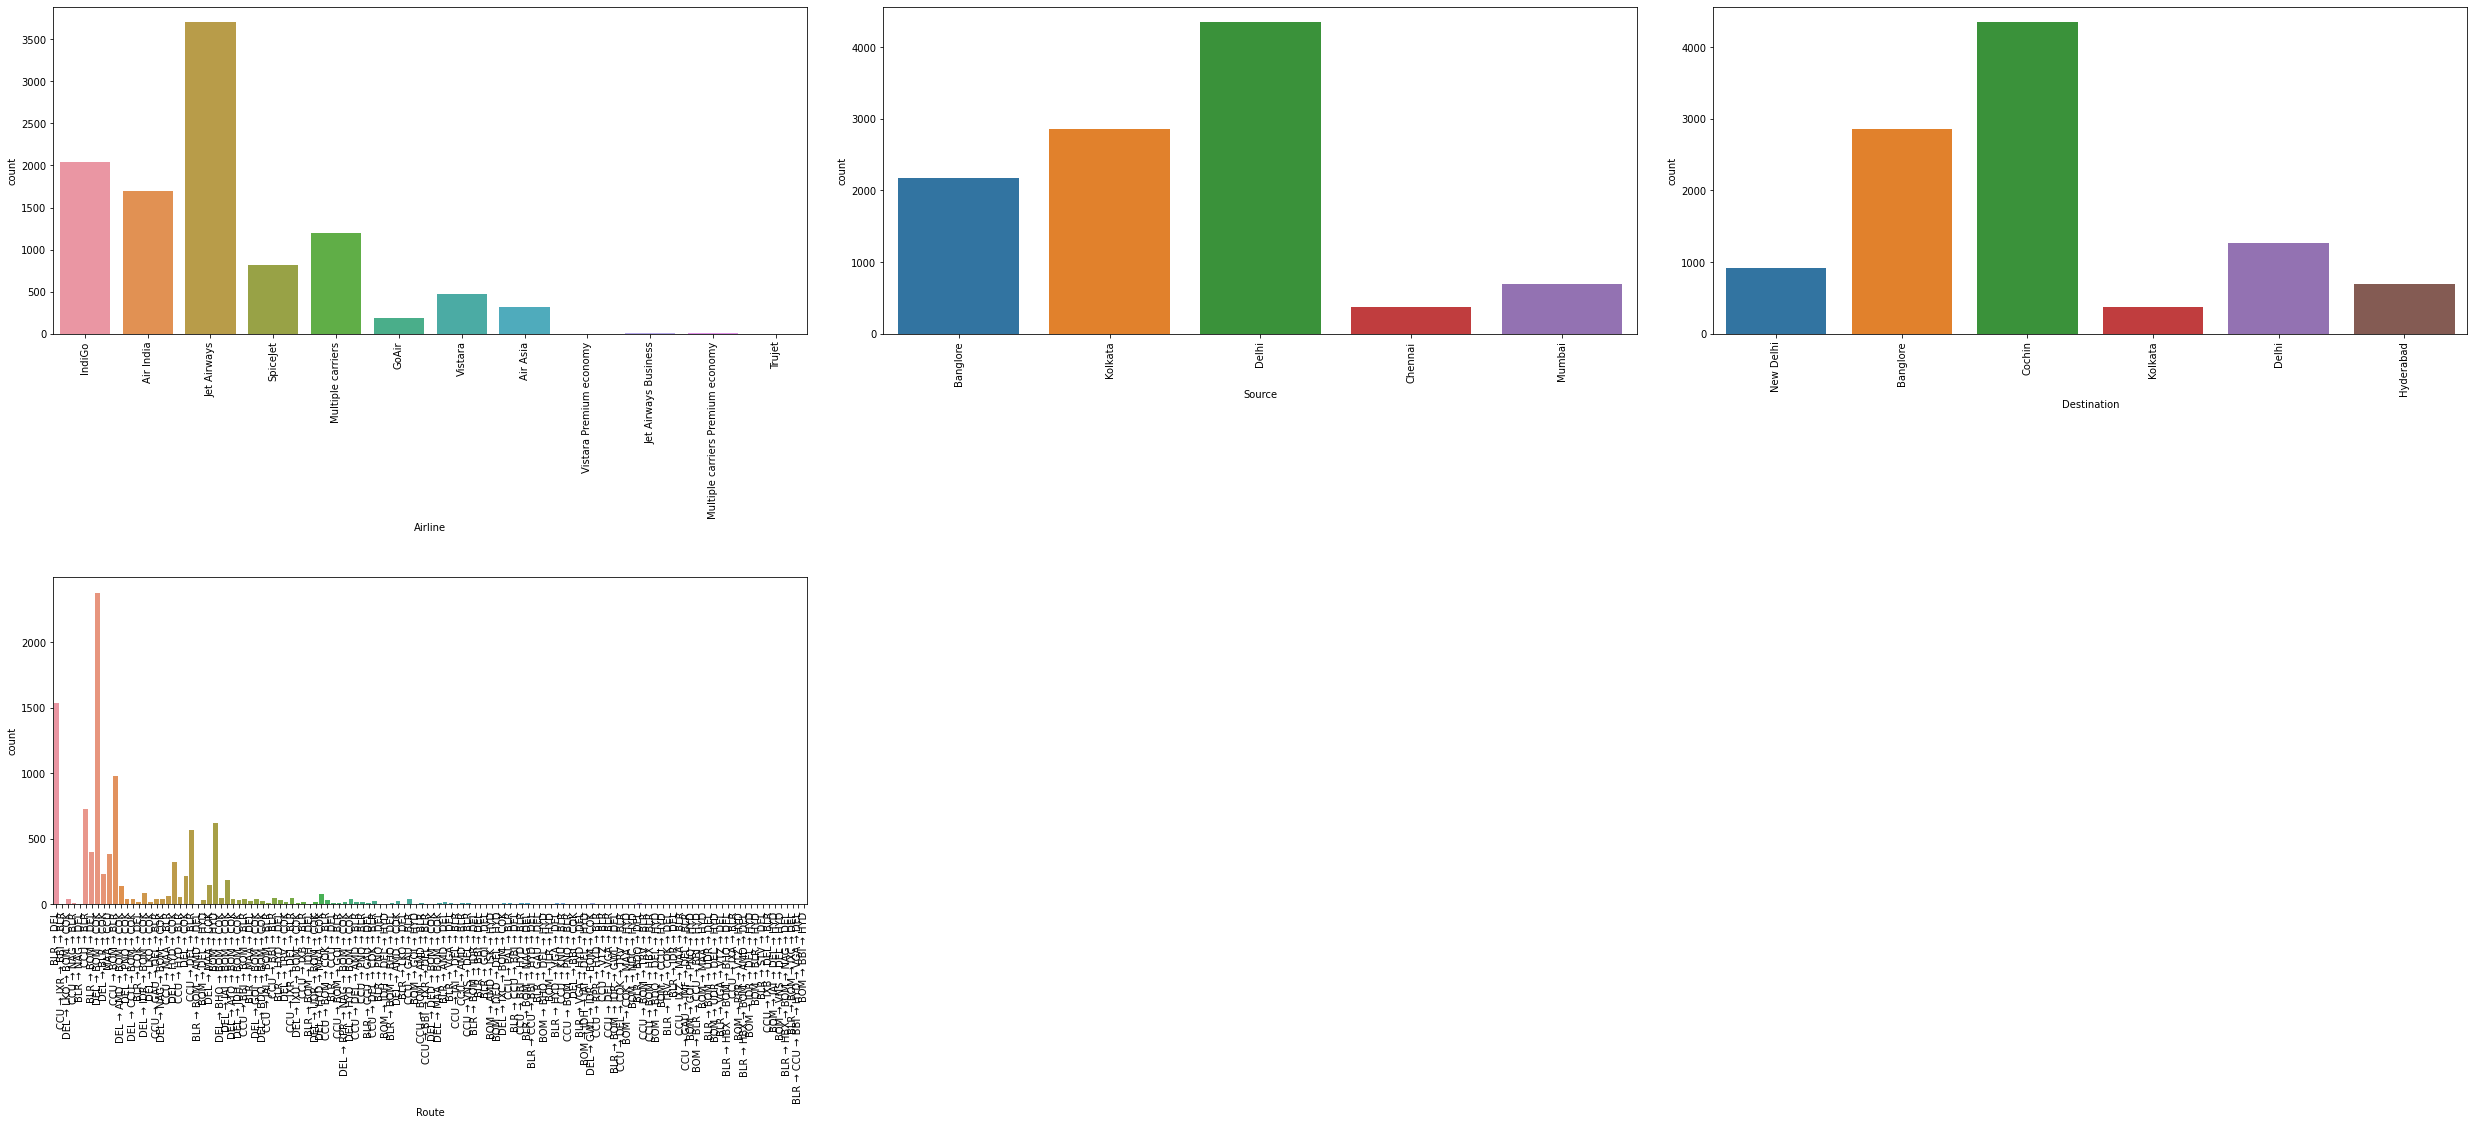

In [ ]:
c = 1
plt.figure(figsize=(35,45))

for i in object_columns:
  plt.subplot(6,3,c)
  sns.countplot(df[i])
  plt.xticks(rotation = 90)
  plt.tight_layout(pad = 3.0)
  c = c+1
plt.show()

Insights:
  - Jet Airways is the most preferred airline with the highest row count, followed by indigo and AirIndia.
  - Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet Airways business is quuite low.
  - Source: Majority of the flights take off from Delhi. Chennai has the minimum count of flight take-offs.
  - Destination: Maximum flights land in Cochin.
  - Kolkatta has the lowest count of receiving the flights.
  - Major Route is Delhi- Bombay- cochin. 

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-23 22:20:00,2022-03-22 01:10:00,170,0.0,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-23 05:50:00,2022-05-23 13:15:00,445,2.0,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-23 09:25:00,2022-06-10 04:25:00,1140,2.0,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-23 18:05:00,2022-05-23 23:30:00,325,1.0,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-23 16:50:00,2022-05-23 21:35:00,285,1.0,13302


In [ ]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

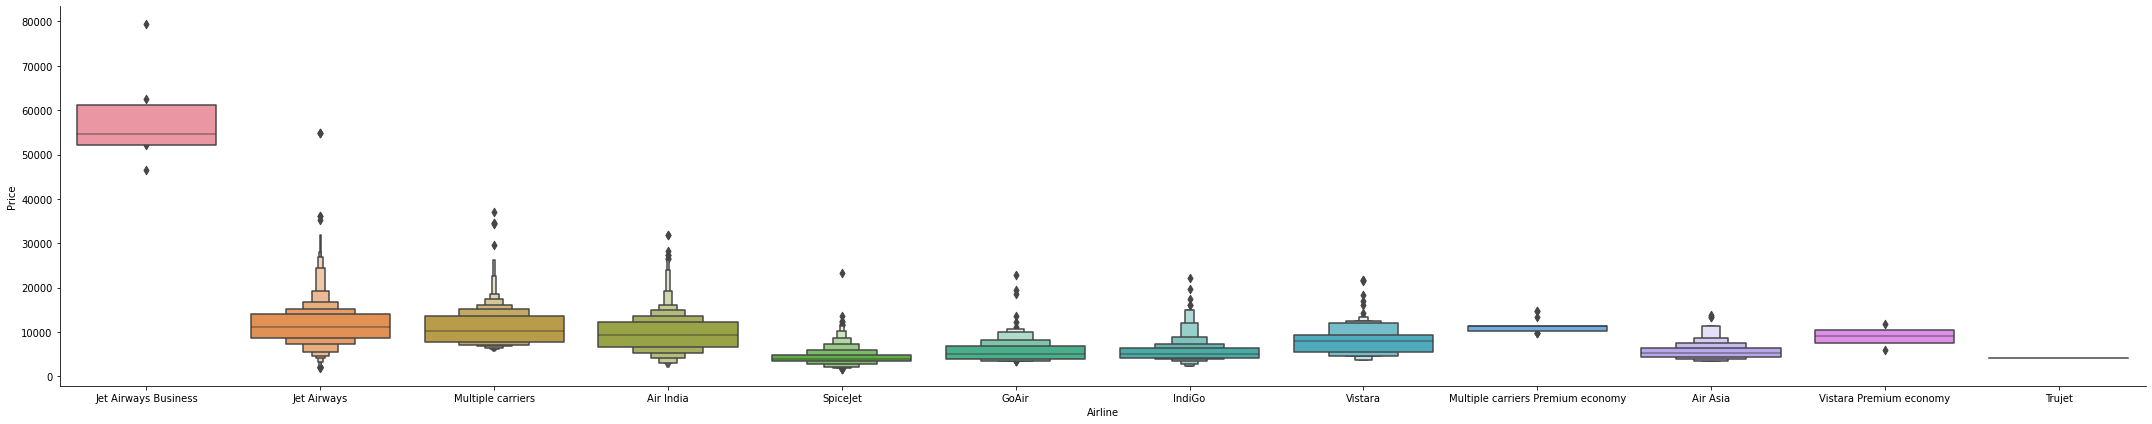

In [ ]:

# the first Airline almost all are having similar median.

# Airline vs Price:

sns.catplot(x = "Airline", y="Price", data = df.sort_values("Price", ascending=False), kind = "boxen", height = 6, aspect = 5)
plt.show()

From graph we can see that Jet Airways Business has highest price.

In [ ]:
# like wise "Source" column:
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

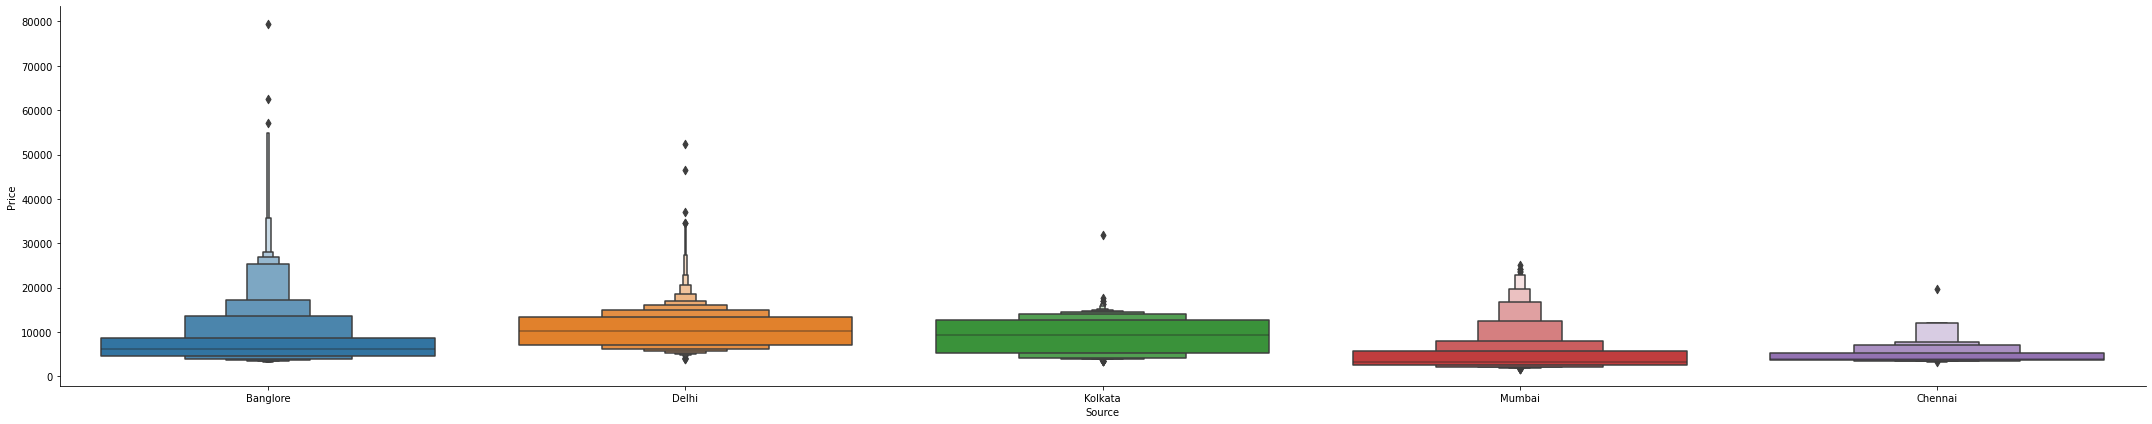

In [ ]:
# Source vs Price:

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending=False), kind = "boxen", height = 6, aspect = 5 )
plt.show()

As we can see most Sources are in Bangalore. there is high demand for the flight.

In [ ]:
# Perform a value count on all columns as check for appropriate conversion technique.
for col in object_columns:
    print(f"Value counts for {col} are as below: ")
    print(df[col].value_counts(normalize=True)*100)
    print("and ,")
    print(f" No. of unique values for {col} is {df[col].nunique()}")
    print("-"*80)

Value counts for Airline are as below: 
Jet Airways                          35.366087
IndiGo                               19.527815
Air India                            16.191933
Multiple carriers                    11.431849
SpiceJet                              7.790097
Vistara                               4.568916
Air Asia                              3.049130
GoAir                                 1.854330
Multiple carriers Premium economy     0.124259
Jet Airways Business                  0.057350
Vistara Premium economy               0.028675
Trujet                                0.009558
Name: Airline, dtype: float64
and ,
 No. of unique values for Airline is 12
--------------------------------------------------------------------------------
Value counts for Source are as below: 
Delhi       41.531256
Kolkata     27.337029
Banglore    20.827758
Mumbai       6.662206
Chennai      3.641751
Name: Source, dtype: float64
and ,
 No. of unique values for Source is 5
-----------------

So, here we can see the value counts of categorical (object_columns) values which we already checked with the plot, but here we can see proper ratio of categorical values.

Insights: 
  - Jet Airways Airline is the most expensive flight and it's ratio is 35.36%. Vistara Premium economy and Trujet Airline is the cheapest airline.
  - Source: Delhi has 41.53% ratio- highest ratio and Chennai has lowest ratio that is 3.64%.
  - Destination: Cochin- highest landing or departure place with 41.53% ratio. and otherhands Kolkata has lowest depature ratio- 3.64%.
  - Route: Best route for flight is Delhi to bombay to Cochin. 
  - Unique value for.. 
    - Airline: 12,
    - Source : 5 , 
    - Destination : 6,
    - Route : 128.

- For "Airline" and "Route" columns we can not use 'One-Hot encoding' or 'Label encoding' as no. of uniques are high and these are not ordinal values.
- Other possible alternative are 'frequency encoding', 'mean encoding' and 'hash encoding'.

- For 'Source' and 'Destination' columns we should use One-hot encoding but not 'label encoding' because no. of uniques are less than 10 and these are also not ordinal.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  datetime64[ns]
 6   Arrival_Time     10462 non-null  datetime64[ns]
 7   Duration         10462 non-null  int64         
 8   Total_Stops      10462 non-null  float64       
 9   Price            10462 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 1.1+ MB


###Frequency Encoding:

In [ ]:
# use "frequency encoding" for 'Airline' column:

airline_freq = df.groupby('Airline').size()/len(df)
airline_freq_dict = airline_freq.to_dict()
df["Freq_encoded_Airline"] = df["Airline"].replace(airline_freq_dict)


In [ ]:
# Explaning:
airline_freq = df.groupby("Airline").size()/len(df)
print(airline_freq)
airline_freq_dict = airline_freq.to_dict()
print(airline_freq_dict)
df["Freq_encoded_Airline"] = df["Airline"].replace(airline_freq_dict)
df[['Airline', 'Freq_encoded_Airline']]

airline_freq

Airline
Air Asia                             0.030491
Air India                            0.161919
GoAir                                0.018543
IndiGo                               0.195278
Jet Airways                          0.353661
Jet Airways Business                 0.000574
Multiple carriers                    0.114318
Multiple carriers Premium economy    0.001243
SpiceJet                             0.077901
Trujet                               0.000096
Vistara                              0.045689
Vistara Premium economy              0.000287
dtype: float64
{'Air Asia': 0.030491301854329956, 'Air India': 0.1619193270885108, 'GoAir': 0.018543299560313517, 'IndiGo': 0.1952781494934047, 'Jet Airways': 0.35366086790288664, 'Jet Airways Business': 0.0005735041101127892, 'Multiple carriers': 0.1143184859491493, 'Multiple carriers Premium economy': 0.0012425922385777097, 'SpiceJet': 0.0779009749569872, 'Trujet': 9.558401835213153e-05, 'Vistara': 0.04568916077231887, 'Vistara Premiu

Airline
Air Asia                             0.030491
Air India                            0.161919
GoAir                                0.018543
IndiGo                               0.195278
Jet Airways                          0.353661
Jet Airways Business                 0.000574
Multiple carriers                    0.114318
Multiple carriers Premium economy    0.001243
SpiceJet                             0.077901
Trujet                               0.000096
Vistara                              0.045689
Vistara Premium economy              0.000287
dtype: float64

In [ ]:
_freq = df.groupby('Airline').size()/len(df)
_freq_dict = _freq.to_dict()
df['Freq_encoded_' + 'Airline'] = df['Airline'].replace(_freq_dict)

In [ ]:
def frequency_encoder(df, col):
  """
  This function encodes a categorical column based on the frequency of their occurance.
  Input:
      df : Input DataFrame in which encoding has to be created.
      col : Column name which has to be encoded. 
  Return:
      frequency encoded dictionary for columns.
  """
  freq_value = df.groupby(col).size()/len(df)
  freq_dict = freq_value.to_dict()
  df['Freq_encoded_' + col] = df[col].replace(freq_dict)
  return freq_dict


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline               10462 non-null  object        
 1   Date_of_Journey       10462 non-null  datetime64[ns]
 2   Source                10462 non-null  object        
 3   Destination           10462 non-null  object        
 4   Route                 10462 non-null  object        
 5   Dep_Time              10462 non-null  datetime64[ns]
 6   Arrival_Time          10462 non-null  datetime64[ns]
 7   Duration              10462 non-null  int64         
 8   Total_Stops           10462 non-null  float64       
 9   Price                 10462 non-null  int64         
 10  Freq_encoded_Airline  10462 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 1.2+ MB


In [ ]:
frequency_encoder(df, 'Source')
frequency_encoder(df, 'Destination')
frequency_encoder(df, 'Route')

{'BLR → AMD → DEL': 0.0017205123303383673,
 'BLR → BBI → DEL': 0.0004779200917606576,
 'BLR → BDQ → DEL': 0.0007646721468170522,
 'BLR → BOM → AMD → DEL': 0.0003823360734085261,
 'BLR → BOM → BHO → DEL': 0.0010514242018734468,
 'BLR → BOM → DEL': 0.038424775377556876,
 'BLR → BOM → IDR → DEL': 0.0004779200917606576,
 'BLR → BOM → IDR → GWL → DEL': 0.00019116803670426305,
 'BLR → BOM → IXC → DEL': 9.558401835213153e-05,
 'BLR → BOM → JDH → DEL': 0.0005735041101127892,
 'BLR → BOM → NAG → DEL': 0.0008602561651691837,
 'BLR → BOM → UDR → DEL': 0.0002867520550563946,
 'BLR → CCU → BBI → DEL': 0.0004779200917606576,
 'BLR → CCU → BBI → HYD → DEL': 0.00019116803670426305,
 'BLR → CCU → BBI → HYD → VGA → DEL': 9.558401835213153e-05,
 'BLR → CCU → DEL': 0.0010514242018734468,
 'BLR → CCU → GAU → DEL': 0.0010514242018734468,
 'BLR → COK → DEL': 0.0014337602752819729,
 'BLR → DEL': 0.14681705218887403,
 'BLR → GAU → DEL': 0.0002867520550563946,
 'BLR → GOI → DEL': 0.0006690881284649206,
 'BLR → 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   10462 non-null  object        
 1   Date_of_Journey           10462 non-null  datetime64[ns]
 2   Source                    10462 non-null  object        
 3   Destination               10462 non-null  object        
 4   Route                     10462 non-null  object        
 5   Dep_Time                  10462 non-null  datetime64[ns]
 6   Arrival_Time              10462 non-null  datetime64[ns]
 7   Duration                  10462 non-null  int64         
 8   Total_Stops               10462 non-null  float64       
 9   Price                     10462 non-null  int64         
 10  Freq_encoded_Airline      10462 non-null  float64       
 11  Freq_encoded_Source       10462 non-null  float64       
 12  Freq_encoded_Desti

### Mean_encoding:

Also we can try "Mean-Target_encoding" for the categorical columns. 
- Caution it can prove to overfit model and should be validated and treated for it.

In [ ]:
# try "mean encoding":

mean_value = df.groupby('Airline')['Price'].mean()
mean_dict = mean_value.to_dict()
df["Mean_encoded_Airline"] = df['Airline'].replace(mean_dict)

In [ ]:

print(mean_value),
print(mean_dict)

Airline
Air Asia                              5590.260188
Air India                             9556.608028
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64
{'Air Asia': 5590.260188087775, 'Air India': 9556.6080283353, 'GoAir': 5861.056701030928, 'IndiGo': 5668.469897209985, 'Jet Airways': 11599.02108108108, 'Jet Airways Business': 58358.666666666664, 'Multiple carriers': 10902.678093645485, 'Multiple carriers Premium economy': 11418.846153846154, 'SpiceJet': 4335.841717791411, 'Trujet': 4140.0, 'Vistara': 7801.3556

In [ ]:
df[df['Airline'] == "Air India"].describe()

,Duration,Total_Stops,Price,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline
count,1694.000000,1694.000000,1694.000000,1.694000e+03,1694.000000,1694.000000,1694.000000,1.694000e+03
mean,926.912633,1.211924,9556.608028,1.619193e-01,0.299538,0.278432,0.044470,9.556608e+03
std,604.288329,0.838712,3937.875634,4.636550e-15,0.112992,0.136095,0.065908,1.673964e-10
min,5.000000,0.000000,2050.000000,1.619193e-01,0.036418,0.036418,0.000096,9.556608e+03
25%,245.000000,1.000000,6597.750000,1.619193e-01,0.208278,0.120914,0.003537,9.556608e+03
50%,920.000000,1.000000,9316.000000,1.619193e-01,0.273370,0.273370,0.013764,9.556608e+03
75%,1440.000000,2.000000,12199.000000,1.619193e-01,0.415313,0.415313,0.059358,9.556608e+03
max,2480.000000,4.000000,31945.000000,1.619193e-01,0.415313,0.415313,0.227108,9.556608e+03


In [ ]:
df[['Airline','Mean_encoded_Airline']]

,Airline,Mean_encoded_Airline
0,IndiGo,5668.469897
1,Air India,9556.608028
2,Jet Airways,11599.021081
3,IndiGo,5668.469897
4,IndiGo,5668.469897
...,...,...
10678,Air Asia,5590.260188
10679,Air India,9556.608028
10680,Jet Airways,11599.021081
10681,Vistara,7801.355649


In [ ]:
# creating a function which encodes all categorical column based on the 'mean encoding'
 
def mean_encoder(df,col,target_col):
    """
    This function encodes a categorical column based on mean-encoding.
    Input:
        df: Input DataFrame in which encoding has to be created.
        col: Column name which has to be encoded.
        target_col: Dependent column to be predicted.
    return:
        Mean encoded dict for categorical columns.
    """
    mean_value = df.groupby(col)[target_col].mean()
    mean_dict = mean_value.to_dict()
    df["Mean_encoded_" + col] = df[col].replace(mean_dict)
    return mean_dict

In [ ]:
mean_encoder(df, 'Source','Price')
mean_encoder(df, 'Destination', 'Price')
mean_encoder(df, 'Route', 'Price')

{'BLR → AMD → DEL': 11134.166666666666,
 'BLR → BBI → DEL': 11486.0,
 'BLR → BDQ → DEL': 11550.5,
 'BLR → BOM → AMD → DEL': 14155.75,
 'BLR → BOM → BHO → DEL': 17211.545454545456,
 'BLR → BOM → DEL': 15723.174129353234,
 'BLR → BOM → IDR → DEL': 15360.6,
 'BLR → BOM → IDR → GWL → DEL': 13387.0,
 'BLR → BOM → IXC → DEL': 13303.0,
 'BLR → BOM → JDH → DEL': 14845.833333333334,
 'BLR → BOM → NAG → DEL': 14685.333333333334,
 'BLR → BOM → UDR → DEL': 11937.666666666666,
 'BLR → CCU → BBI → DEL': 9155.0,
 'BLR → CCU → BBI → HYD → DEL': 12713.5,
 'BLR → CCU → BBI → HYD → VGA → DEL': 17686.0,
 'BLR → CCU → DEL': 12260.272727272728,
 'BLR → CCU → GAU → DEL': 11810.0,
 'BLR → COK → DEL': 9139.133333333333,
 'BLR → DEL': 5552.235677083333,
 'BLR → GAU → DEL': 12508.333333333334,
 'BLR → GOI → DEL': 8759.857142857143,
 'BLR → HBX → BOM → AMD → DEL': 10573.0,
 'BLR → HBX → BOM → BHO → DEL': 14195.0,
 'BLR → HBX → BOM → NAG → DEL': 12358.0,
 'BLR → HYD → DEL': 6473.027027027027,
 'BLR → HYD → VGA → D

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Airline                   10462 non-null  object        
 1   Date_of_Journey           10462 non-null  datetime64[ns]
 2   Source                    10462 non-null  object        
 3   Destination               10462 non-null  object        
 4   Route                     10462 non-null  object        
 5   Dep_Time                  10462 non-null  datetime64[ns]
 6   Arrival_Time              10462 non-null  datetime64[ns]
 7   Duration                  10462 non-null  int64         
 8   Total_Stops               10462 non-null  float64       
 9   Price                     10462 non-null  int64         
 10  Freq_encoded_Airline      10462 non-null  float64       
 11  Freq_encoded_Source       10462 non-null  float64       
 12  Freq_encoded_Desti

Hash Encoding:

tried Frequency encoding and mean-encoding for categorical(or object value) we can also try "Hash_Encoding" for categorical columns.
- Suitable when number of uniques are high and data is not ordinal.
- install in your packages library category_encoder to use it.
- ! pip install category_encoders.
- from category_encoder.hashing import HashingEncoder
- to be added as a pipeline.

Label Encoding.

In [ ]:
# Applying "Label Encoding" to categorical columns [as Hit and Trail]

from sklearn.preprocessing import LabelEncoder


In [ ]:
# Creating a function for Label encoder to categorical columns:

def label_encoder(df, col):
  """
  This function encodes a categorical column based on the basis of their order label.
  Input:
      df: Input DataFrame in which encoding ha sto be created.
      col: Column name which has to be encoded.
  Return:
      Label encoded dict for columns.
  """
  le = LabelEncoder()
  le.fit(df[col])
  label_dict = dict(zip((le.classes_),le.transform(le.classes_)))
  df["Label_encoded_" + col] = df[col].replace(label_dict)
  return label_dict

In [ ]:
print(label_encoder(df,'Airline'))

{'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}


In [ ]:
label_encoder(df, "Source")
label_encoder(df, "Destination")
label_encoder(df, "Route")

{'BLR → AMD → DEL': 0,
 'BLR → BBI → DEL': 1,
 'BLR → BDQ → DEL': 2,
 'BLR → BOM → AMD → DEL': 3,
 'BLR → BOM → BHO → DEL': 4,
 'BLR → BOM → DEL': 5,
 'BLR → BOM → IDR → DEL': 6,
 'BLR → BOM → IDR → GWL → DEL': 7,
 'BLR → BOM → IXC → DEL': 8,
 'BLR → BOM → JDH → DEL': 9,
 'BLR → BOM → NAG → DEL': 10,
 'BLR → BOM → UDR → DEL': 11,
 'BLR → CCU → BBI → DEL': 12,
 'BLR → CCU → BBI → HYD → DEL': 13,
 'BLR → CCU → BBI → HYD → VGA → DEL': 14,
 'BLR → CCU → DEL': 15,
 'BLR → CCU → GAU → DEL': 16,
 'BLR → COK → DEL': 17,
 'BLR → DEL': 18,
 'BLR → GAU → DEL': 19,
 'BLR → GOI → DEL': 20,
 'BLR → HBX → BOM → AMD → DEL': 21,
 'BLR → HBX → BOM → BHO → DEL': 22,
 'BLR → HBX → BOM → NAG → DEL': 23,
 'BLR → HYD → DEL': 24,
 'BLR → HYD → VGA → DEL': 25,
 'BLR → IDR → DEL': 26,
 'BLR → LKO → DEL': 27,
 'BLR → MAA → DEL': 28,
 'BLR → NAG → DEL': 29,
 'BLR → PNQ → DEL': 30,
 'BLR → STV → DEL': 31,
 'BLR → TRV → COK → DEL': 32,
 'BLR → VGA → DEL': 33,
 'BLR → VGA → HYD → DEL': 34,
 'BLR → VGA → VTZ → DEL': 

In [ ]:
df[["Airline", "Label_encoded_Airline"]]

,Airline,Label_encoded_Airline
0,IndiGo,3
1,Air India,1
2,Jet Airways,4
3,IndiGo,3
4,IndiGo,3
...,...,...
10678,Air Asia,0
10679,Air India,1
10680,Jet Airways,4
10681,Vistara,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    10462 non-null  object        
 1   Date_of_Journey            10462 non-null  datetime64[ns]
 2   Source                     10462 non-null  object        
 3   Destination                10462 non-null  object        
 4   Route                      10462 non-null  object        
 5   Dep_Time                   10462 non-null  datetime64[ns]
 6   Arrival_Time               10462 non-null  datetime64[ns]
 7   Duration                   10462 non-null  int64         
 8   Total_Stops                10462 non-null  float64       
 9   Price                      10462 non-null  int64         
 10  Freq_encoded_Airline       10462 non-null  float64       
 11  Freq_encoded_Source        10462 non-null  float64       
 12  Freq

In [ ]:
# creating a function to handle categorical value:

def handle_categorical_values(df, target):
  """
  This function handles categorical value and create a dataframe.
  Input: 
      df: DataFrame which require categorical value treatment.
  Return:
      DataFrame with all categorical value handled.
  """

  encoded_dict = {}
  # Getting all object columns:
  object_columns = df.select_dtypes(object).columns

  # generate frequency encoded categorical values.
  frequency_encoded_dict = {}
  for col in object_columns:
    freq_dict = frequency_encoder(df, col)
    frequency_encoded_dict[col] = freq_dict

  # generate target mean encoded categorical values:
  mean_encoded_dict = {}
  for col in object_columns:
    mean_dict = mean_encoder(df, col, target)
    mean_encoded_dict[col] = mean_dict

  # generate label encoded categorical values:
  label_encoded_dict = {}
  for col in object_columns:
    label_dict = label_encoder(df, col)
    label_encoded_dict[col] = label_dict

  encoded_dict["Frequency"] = frequency_encoded_dict
  encoded_dict["Mean"] = mean_encoded_dict
  encoded_dict["Label"] = label_encoded_dict

  return encoded_dict

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    10462 non-null  object        
 1   Date_of_Journey            10462 non-null  datetime64[ns]
 2   Source                     10462 non-null  object        
 3   Destination                10462 non-null  object        
 4   Route                      10462 non-null  object        
 5   Dep_Time                   10462 non-null  datetime64[ns]
 6   Arrival_Time               10462 non-null  datetime64[ns]
 7   Duration                   10462 non-null  int64         
 8   Total_Stops                10462 non-null  float64       
 9   Price                      10462 non-null  int64         
 10  Freq_encoded_Airline       10462 non-null  float64       
 11  Freq_encoded_Source        10462 non-null  float64       
 12  Freq

In [ ]:
encoded_dict = handle_categorical_values(df, 'Price')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    10462 non-null  object        
 1   Date_of_Journey            10462 non-null  datetime64[ns]
 2   Source                     10462 non-null  object        
 3   Destination                10462 non-null  object        
 4   Route                      10462 non-null  object        
 5   Dep_Time                   10462 non-null  datetime64[ns]
 6   Arrival_Time               10462 non-null  datetime64[ns]
 7   Duration                   10462 non-null  int64         
 8   Total_Stops                10462 non-null  float64       
 9   Price                      10462 non-null  int64         
 10  Freq_encoded_Airline       10462 non-null  float64       
 11  Freq_encoded_Source        10462 non-null  float64       
 12  Freq

## Handling Outlier Values:

In [ ]:
# to be added

In [ ]:
# Can be added as a inbuilt pre-processing pipline.

## Feature Selection and Engineering:

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,...,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-23 22:20:00,2022-03-22 01:10:00,170,0.0,3897,...,0.087364,0.146817,5668.469897,8022.872877,12007.421225,5552.235677,3,0,5,18
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-23 05:50:00,2022-05-23 13:15:00,445,2.0,7662,...,0.273370,0.000574,9556.608028,9143.083566,9143.083566,7369.166667,1,3,0,84
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-23 09:25:00,2022-06-10 04:25:00,1140,2.0,13882,...,0.415313,0.003919,11599.021081,10461.600690,10461.600690,13277.195122,4,2,1,118
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-23 18:05:00,2022-05-23 23:30:00,325,1.0,6218,...,0.273370,0.000860,5668.469897,9143.083566,9143.083566,6279.333333,3,3,0,91
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-23 16:50:00,2022-05-23 21:35:00,285,1.0,13302,...,0.087364,0.000287,5668.469897,8022.872877,12007.421225,11313.000000,3,0,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-05-23 19:55:00,2022-05-23 22:25:00,150,0.0,4107,...,0.273370,0.069203,5590.260188,9143.083566,9143.083566,4556.055249,0,3,0,64
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-05-23 20:45:00,2022-05-23 23:20:00,155,0.0,4145,...,0.273370,0.069203,9556.608028,9143.083566,9143.083566,4556.055249,1,3,0,64
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-05-23 08:20:00,2022-05-23 11:20:00,180,0.0,7229,...,0.120914,0.146817,11599.021081,8022.872877,5143.918577,5552.235677,4,0,2,18
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-05-23 11:30:00,2022-05-23 14:10:00,160,0.0,12648,...,0.087364,0.146817,7801.355649,8022.872877,12007.421225,5552.235677,10,0,5,18


In [ ]:
# check columns:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Freq_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route',
       'Mean_encoded_Airline', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Airline', 'Label_encoded_Source',
       'Label_encoded_Destination', 'Label_encoded_Route'],
      dtype='object')

In [ ]:
# Now, let's check correlation for all columns:

df.corr()

,Duration,Total_Stops,Price,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route
Duration,1.000000,0.727982,0.501758,0.289457,0.400039,0.403206,-0.111065,0.433989,0.414954,0.453452,0.671871,-0.153618,0.162808,-0.254243,0.273200
Total_Stops,0.727982,1.000000,0.602013,0.211803,0.571402,0.575447,-0.205605,0.421327,0.559200,0.595820,0.806690,-0.194549,0.194203,-0.291763,0.441347
Price,0.501758,0.602013,1.000000,0.371620,0.350997,0.311329,0.038912,0.638674,0.359938,0.491191,0.746275,-0.036491,0.013796,-0.065875,0.154374
Freq_encoded_Airline,0.289457,0.211803,0.371620,1.000000,0.038026,0.029203,0.019636,0.581861,0.056089,0.102435,0.367567,-0.200348,0.055926,-0.035332,-0.065789
Freq_encoded_Source,0.400039,0.571402,0.350997,0.038026,1.000000,0.959924,0.303115,0.258498,0.975159,0.714584,0.470332,-0.049748,0.066914,-0.544907,0.612054
Freq_encoded_Destination,0.403206,0.575447,0.311329,0.029203,0.959924,1.000000,0.247081,0.234645,0.915733,0.633826,0.420651,-0.033982,0.308334,-0.672920,0.763369
Freq_encoded_Route,-0.111065,-0.205605,0.038912,0.019636,0.303115,0.247081,1.000000,0.158467,0.272478,0.039335,0.052142,0.194054,-0.196373,-0.083163,0.055678
Mean_encoded_Airline,0.433989,0.421327,0.638674,0.581861,0.258498,0.234645,0.158467,1.000000,0.257259,0.277117,0.572144,-0.057135,0.047805,-0.094354,0.071608
Mean_encoded_Source,0.414954,0.559200,0.359938,0.056089,0.975159,0.915733,0.272478,0.257259,1.000000,0.732787,0.482313,-0.059864,0.038329,-0.606651,0.496810
Mean_encoded_Destination,0.453452,0.595820,0.491191,0.102435,0.714584,0.633826,0.039335,0.277117,0.732787,1.000000,0.614966,-0.082190,0.028087,-0.134114,0.339975


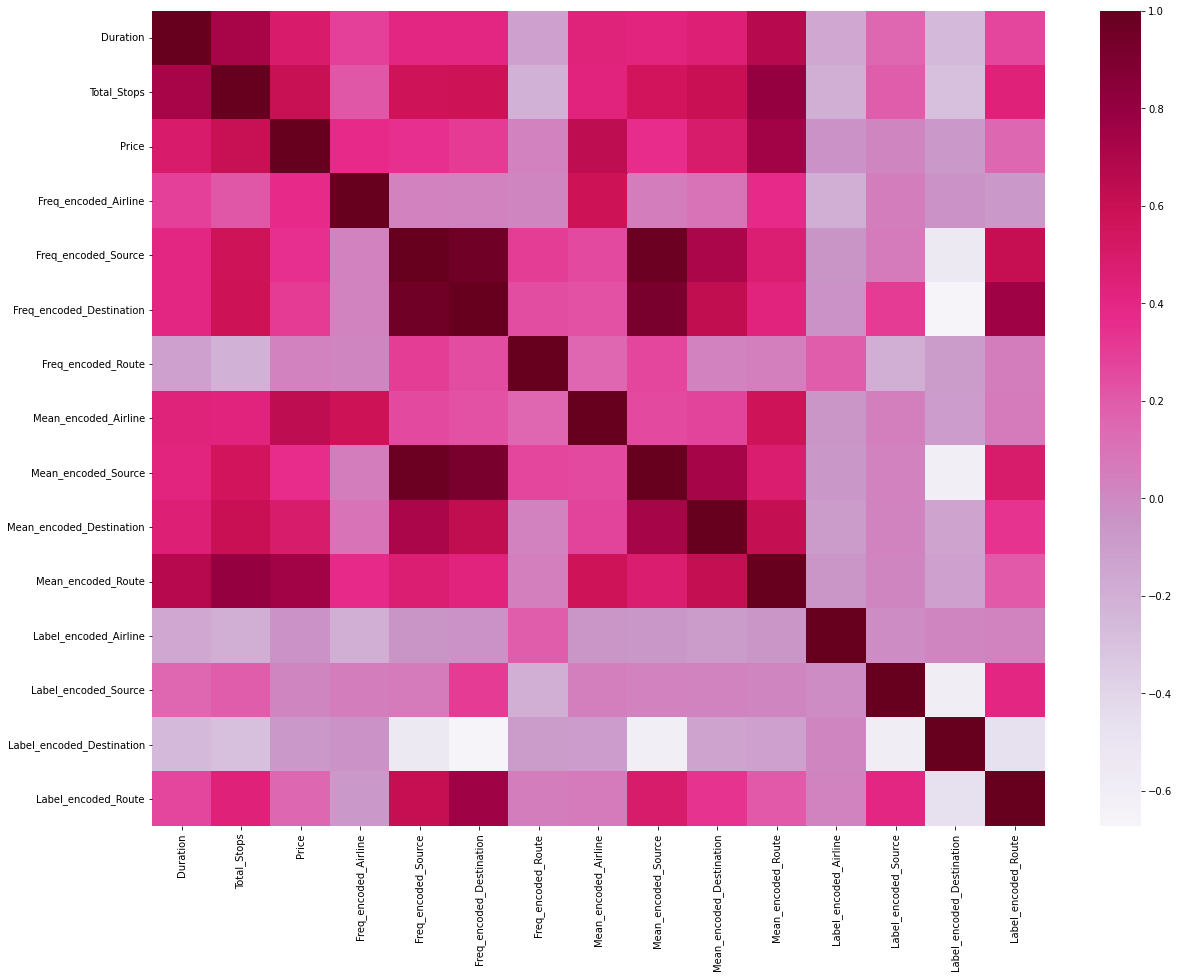

In [ ]:
# create a heatmap:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap = 'PuRd')
plt.show()

Insights:
  - correlation high between Freq_encoded_Source and Mean_encoded_Source.
  - like wise correlation high between Freq_encoded_Source and Freq_encoded_Destination.
  - and others value like Total_Stops and Destination, Duration and Total_stops,Freq_encoded_Destination and Mean_encoded_source etc. has really good correlation in between. but still there are so many values which are not so good for the good model.

for the target price:
  - Freq_encoded_Source, Freq_encoded_Destination, Mean_encoded_Airline, Mean_encoded_Source, Mean_encoded_Destination- all features those are showing good crrelation with the target 'Price': 0.4 and above should be to build model.
  - Features which are mildly not related can be dropped.
  

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Freq_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route',
       'Mean_encoded_Airline', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Airline', 'Label_encoded_Source',
       'Label_encoded_Destination', 'Label_encoded_Route'],
      dtype='object')

In [ ]:
# Time base features can be generated.
# as we have "Date_of_journey" column from that
# we can generate day_of_week, weekdays, moth and deapture hour:

# Day_of_week:
# use 'dt.day_of_week':
df['Day_of_week'] = df["Date_of_Journey"].dt.day_of_week

# Day_of_month:
# use 'dt.day':
df['Day_of_month'] = df['Date_of_Journey'].dt.day 

# Weekday: # where we create 'Day_of_week' column just above:
# use 'np.where' for days of the week where [5,6] means saturday,sunday:
df["Weekday"] = np.where(df["Day_of_week"].isin([5,6]),0,1)

# Month of Travel:
# use 'dt.month':
df['Month'] = df['Date_of_Journey'].dt.month

# Hour of Depature etc: # as we already have 'Dep_Time' column:
# use 'dt.hour':
df['Dep_hour'] = df['Dep_Time'].dt.hour



In [ ]:
# create correlation plot again:

df.corr()

,Duration,Total_Stops,Price,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Day_of_week,Day_of_month,Weekday,Month,Dep_hour
Duration,1.000000,0.727982,0.501758,0.289457,0.400039,0.403206,-0.111065,0.433989,0.414954,0.453452,0.671871,-0.153618,0.162808,-0.254243,0.273200,0.023158,-0.047257,0.005944,0.056328,-0.001285
Total_Stops,0.727982,1.000000,0.602013,0.211803,0.571402,0.575447,-0.205605,0.421327,0.559200,0.595820,0.806690,-0.194549,0.194203,-0.291763,0.441347,0.006147,-0.035371,0.018291,0.065438,-0.067523
Price,0.501758,0.602013,1.000000,0.371620,0.350997,0.311329,0.038912,0.638674,0.359938,0.491191,0.746275,-0.036491,0.013796,-0.065875,0.154374,-0.005112,-0.171142,-0.013267,0.008662,0.005155
Freq_encoded_Airline,0.289457,0.211803,0.371620,1.000000,0.038026,0.029203,0.019636,0.581861,0.056089,0.102435,0.367567,-0.200348,0.055926,-0.035332,-0.065789,0.004228,-0.038976,0.029408,0.051802,0.106050
Freq_encoded_Source,0.400039,0.571402,0.350997,0.038026,1.000000,0.959924,0.303115,0.258498,0.975159,0.714584,0.470332,-0.049748,0.066914,-0.544907,0.612054,-0.007342,0.077903,-0.014222,0.029936,-0.060469
Freq_encoded_Destination,0.403206,0.575447,0.311329,0.029203,0.959924,1.000000,0.247081,0.234645,0.915733,0.633826,0.420651,-0.033982,0.308334,-0.672920,0.763369,0.008631,0.087448,-0.015694,0.047968,-0.047777
Freq_encoded_Route,-0.111065,-0.205605,0.038912,0.019636,0.303115,0.247081,1.000000,0.158467,0.272478,0.039335,0.052142,0.194054,-0.196373,-0.083163,0.055678,-0.025374,0.069304,-0.017799,-0.017287,-0.006923
Mean_encoded_Airline,0.433989,0.421327,0.638674,0.581861,0.258498,0.234645,0.158467,1.000000,0.257259,0.277117,0.572144,-0.057135,0.047805,-0.094354,0.071608,-0.002266,-0.038360,0.028215,0.043311,0.019624
Mean_encoded_Source,0.414954,0.559200,0.359938,0.056089,0.975159,0.915733,0.272478,0.257259,1.000000,0.732787,0.482313,-0.059864,0.038329,-0.606651,0.496810,0.017508,0.058600,-0.018388,0.036055,-0.029458
Mean_encoded_Destination,0.453452,0.595820,0.491191,0.102435,0.714584,0.633826,0.039335,0.277117,0.732787,1.000000,0.614966,-0.082190,0.028087,-0.134114,0.339975,0.003945,-0.011936,-0.012254,-0.026473,-0.036796


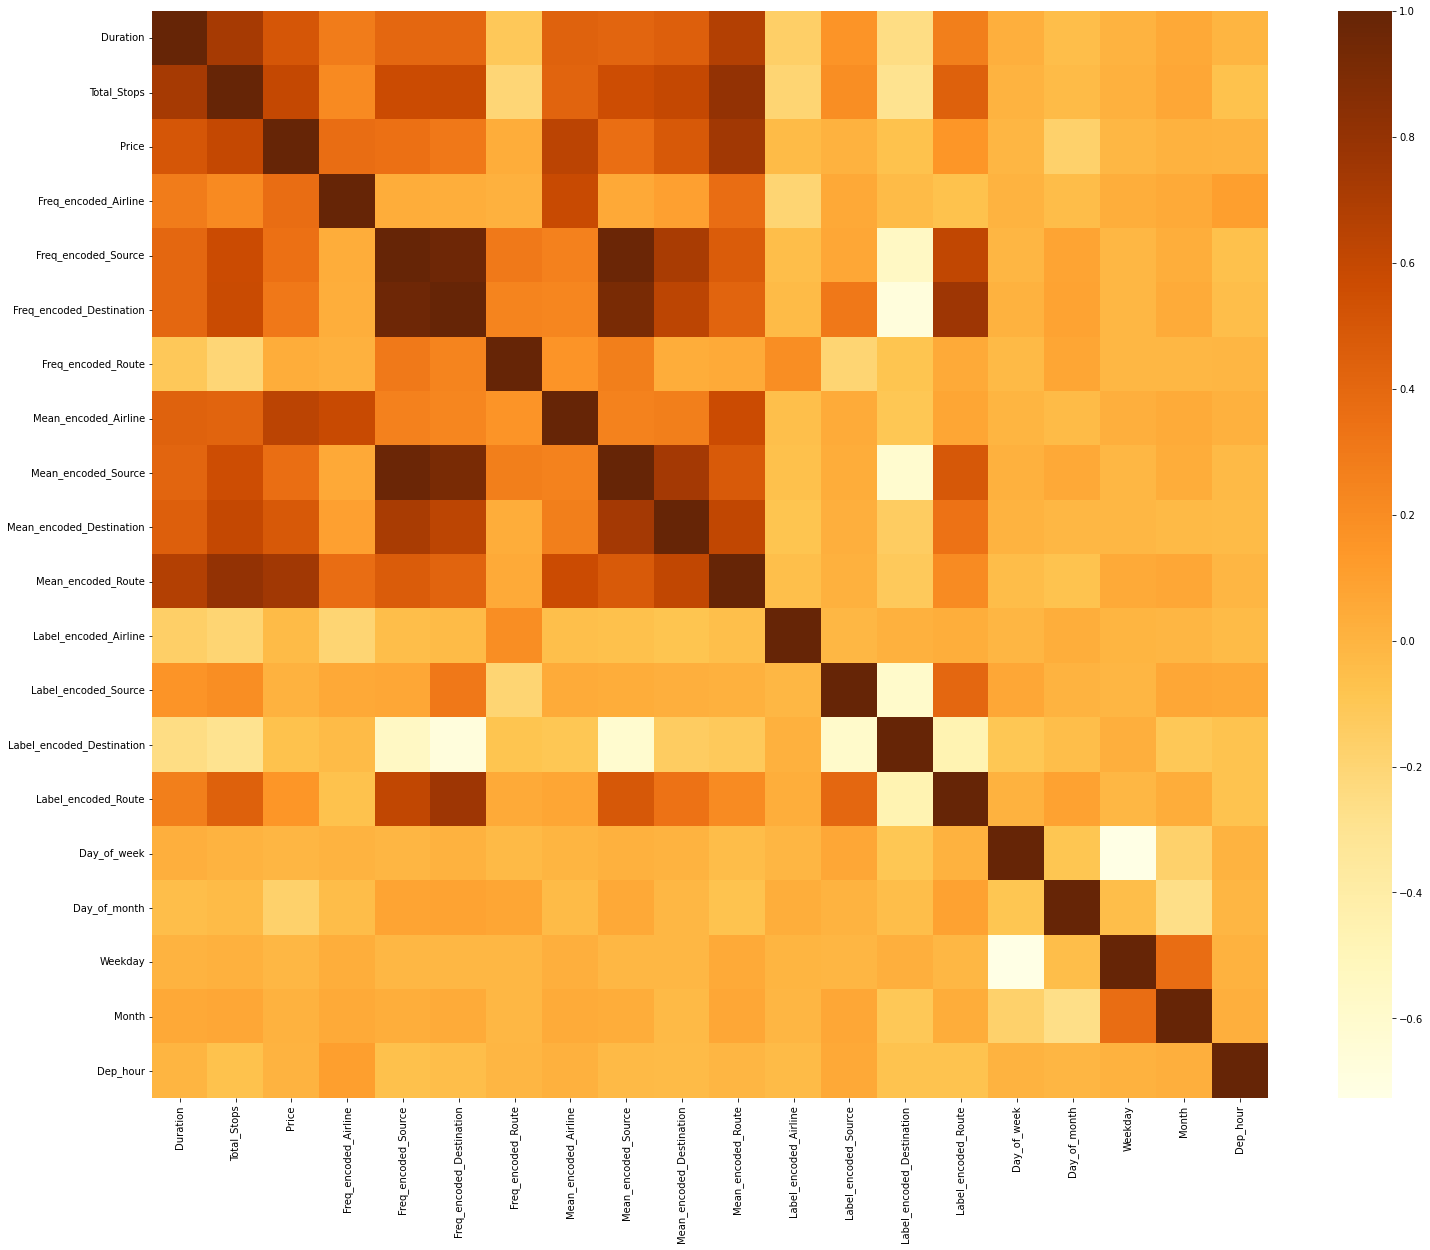

In [ ]:
# as we added new columns and already check correlation between them.
# let's check with heatmap with new columns:

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), cmap = 'YlOrBr')
plt.show()

- Higher order of features can be used as well and these are called "polynomial features".
- "Domain based features" can be added as well if applicable.

In [ ]:
# Generating additional features in dataframe: 

def generate_additional_features(df):
  """
  This Function generates additional features.
  Input:
      df: DataFrame from which feature has to be generated.
  Return:
      None
  """
  # Time base features can be generated.
  # as we have "Date_of_journey" column from that
  # we can generate day_of_week, weekdays, moth and deapture hour:

  # Day_of_week:
  # use 'dt.day_of_week':
  df['Day_of_week'] = df["Date_of_Journey"].dt.day_of_week

  #  Day_of_month:
  # use 'dt.day':
  df['Day_of_month'] = df['Date_of_Journey'].dt.day 

  # Weekday: # where we create 'Day_of_week' column just above:
  # use 'np.where' for days of the week where [5,6] means saturday,sunday:
  df["Weekday"] = np.where(df["Day_of_week"].isin([5,6]),0,1)

  # Month of Travel:
  # use 'dt.month':
  df['Month'] = df['Date_of_Journey'].dt.month

  # Hour of Depature etc: # as we already have 'Dep_Time' column:
  # use 'dt.hour':
  df['Dep_hour'] = df['Dep_Time'].dt.hour

generate_additional_features(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Airline                    10462 non-null  object        
 1   Date_of_Journey            10462 non-null  datetime64[ns]
 2   Source                     10462 non-null  object        
 3   Destination                10462 non-null  object        
 4   Route                      10462 non-null  object        
 5   Dep_Time                   10462 non-null  datetime64[ns]
 6   Arrival_Time               10462 non-null  datetime64[ns]
 7   Duration                   10462 non-null  int64         
 8   Total_Stops                10462 non-null  float64       
 9   Price                      10462 non-null  int64         
 10  Freq_encoded_Airline       10462 non-null  float64       
 11  Freq_encoded_Source        10462 non-null  float64       
 12  Freq

## Scaling the Data:

In [ ]:
# Can added based on distribution of data.
# Gaussian like feature with bell-shaped curve can be scale with Standarization.
# No-Gaussian or skewed data can be scaled with Normalization.

In [ ]:
# Can be added as a pipeline.

## Model Building:

In [ ]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Freq_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route',
       'Mean_encoded_Airline', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Airline', 'Label_encoded_Source',
       'Label_encoded_Destination', 'Label_encoded_Route', 'Day_of_week',
       'Day_of_month', 'Weekday', 'Month', 'Dep_hour'],
      dtype='object')

In [ ]:
# Seperate predictors and Target variables.

X = df.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Price'], axis=1)
y = df["Price"]

In [ ]:
def filter_predictor_columns(df):
  """
  This function filters predictor columns from incoming Data.
  """

  predictor_columns = ['Duration', 'Total_Stops',
       'Freq_encoded_Airline', 'Freq_encoded_Source',
       'Freq_encoded_Destination', 'Freq_encoded_Route',
       'Mean_encoded_Airline', 'Mean_encoded_Source',
       'Mean_encoded_Destination', 'Mean_encoded_Route',
       'Label_encoded_Airline', 'Label_encoded_Source',
       'Label_encoded_Destination', 'Label_encoded_Route', 'Day_of_week',
       'Day_of_month', 'Weekday', 'Month', 'Dep_hour']
  return df[predictor_columns]

In [ ]:
_ = filter_predictor_columns(df)
_

,Duration,Total_Stops,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Day_of_week,Day_of_month,Weekday,Month,Dep_hour
0,170,0.0,0.195278,0.208278,0.087364,0.146817,5668.469897,8022.872877,12007.421225,5552.235677,3,0,5,18,6,24,0,3,22
1,445,2.0,0.161919,0.273370,0.273370,0.000574,9556.608028,9143.083566,9143.083566,7369.166667,1,3,0,84,5,5,0,1,5
2,1140,2.0,0.353661,0.415313,0.415313,0.003919,11599.021081,10461.600690,10461.600690,13277.195122,4,2,1,118,4,6,1,9,9
3,325,1.0,0.195278,0.273370,0.273370,0.000860,5668.469897,9143.083566,9143.083566,6279.333333,3,3,0,91,3,5,1,12,18
4,285,1.0,0.195278,0.208278,0.087364,0.000287,5668.469897,8022.872877,12007.421225,11313.000000,3,0,5,29,3,3,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0.0,0.030491,0.273370,0.273370,0.069203,5590.260188,9143.083566,9143.083566,4556.055249,0,3,0,64,2,4,1,9,19
10679,155,0.0,0.161919,0.273370,0.273370,0.069203,9556.608028,9143.083566,9143.083566,4556.055249,1,3,0,64,5,27,0,4,20
10680,180,0.0,0.353661,0.208278,0.120914,0.146817,11599.021081,8022.872877,5143.918577,5552.235677,4,0,2,18,5,27,0,4,8
10681,160,0.0,0.045689,0.208278,0.087364,0.146817,7801.355649,8022.872877,12007.421225,5552.235677,10,0,5,18,3,3,1,1,11


# Model Building and Perfomance Check:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import SplineTransformer

from sklearn import linear_model
from sklearn import metrics

In [ ]:


# Split the data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape


((7009, 19), (3453, 19))

In [ ]:
y_train.shape, y_test.shape

((7009,), (3453,))

### Baseline Model:

In [ ]:
# baseline model:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
metrics.r2_score(y_train, reg.predict(X_train)), metrics.r2_score(y_test, reg.predict(X_test))

(0.6607842122749666, 0.6479600704779648)

In [ ]:
from matplotlib import test
# k-fold cross-validation:

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(metrics.r2_score(y_train, reg.predict(X_train)), metrics.r2_score(y_test, reg.predict(X_test)))
    print("-" * 80)

TRAIN: [ 2093  2094  2095 ... 10459 10460 10461] TEST: [   0    1    2 ... 2090 2091 2092]
0.6609111009335289 0.6407630942838665
--------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 10459 10460 10461] TEST: [2093 2094 2095 ... 4183 4184 4185]
0.6551540988034807 0.6621612013577918
--------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 10459 10460 10461] TEST: [4186 4187 4188 ... 6275 6276 6277]
0.6550710562305253 0.6633933893110229
--------------------------------------------------------------------------------
TRAIN: [    0     1     2 ... 10459 10460 10461] TEST: [6278 6279 6280 ... 8367 8368 8369]
0.6580690059522933 0.6499809642273997
--------------------------------------------------------------------------------
TRAIN: [   0    1    2 ... 8367 8368 8369] TEST: [ 8370  8371  8372 ... 10459 10460 10461]
0.654368104477157 0.666079787734542
---------------------------------

As we can check, this Baseline Model is good model. we will compare baseline model with another models like random model, Decision Tree or knn model for improving our data.
- but as if now, Baseline Model is a good model as train data nd test data behave Similarly. 

### Overfitted Model:

In [ ]:
# Over-fitted model:
%%time
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(3), RobustScaler(),linear_model.LinearRegression())
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


CPU times: user 9.57 s, sys: 602 ms, total: 10.2 s
Wall time: 6.73 s


In [ ]:
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(3), RobustScaler(),linear_model.LinearRegression())
pipe.fit(X_train, y_train)

metrics.r2_score(y_train, pipe.predict(X_train)), metrics.r2_score(y_test, pipe.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


(0.850819675831234, 0.608666590837689)

As we can see in over-fitted model using the pipeline like PowerTransformer, PolynomialFeatures, RoubstScaler and linear regression we can set the fitted value of train data. but here X_train and y_train has a little big different. So, we can't say it is Over-fitted model but we can say that it's not so good model. So, we can try some other model as well. 

### Regularized Model:

In [ ]:
# Regularised Model:

%%time

pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(4),RobustScaler(), linear_model.LassoLars(alpha = .1, normalize=False))
pipe.fit(X_train, y_train)

print(metrics.r2_score(y_train, pipe.predict(X_train)), metrics.r2_score(y_test, pipe.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


0.7730328284796348 0.7214283714247882
CPU times: user 1min 13s, sys: 5.07 s, total: 1min 18s
Wall time: 49.5 s


In [ ]:


pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(4),SplineTransformer(degree=2, n_knots=5), 
                     RobustScaler(),linear_model.LassoLars(alpha=.1, normalize=False))
pipe.fit(X_train, y_train)

metrics.r2_score(y_train, pipe.predict(X_train)), metrics.r2_score(y_test, pipe.predict(X_test))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


(0.7673601111313673, 0.7004203531340499)

here, model perform well. the predicted value between train dataset and test dataset has not much difference. So, it is good model or fitted model. 

### Other Model Variation.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### K-Nearest Neighbour Model:

In [ ]:
%%time
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
params


CPU times: user 15 µs, sys: 1e+03 ns, total: 16 µs
Wall time: 23.4 µs


In [ ]:
%%time

k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)
print(metrics.r2_score(y_train,knn_regressor.predict(X_train)),metrics.r2_score(y_test,knn_regressor.predict(X_test)))

0.7930694749116137 0.6986340568866749
CPU times: user 58.4 s, sys: 33.2 s, total: 1min 31s
Wall time: 53.4 s


In [ ]:
knn_regressor.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')>

In [ ]:
knn_regressor.best_params_

{'n_neighbors': 5}

here, we are importing 'pickle' and 'joblib' libraries to dump the data in model and for reuse will use load.after imporing the libraries we make a folder for every model to dump and load the model in specific model with there own model name and then we can have better idea for each model that which model have what kind of test data and what kind of train data. which model perfomance is good. i  short we will have summary of all model's test and train data.

In [ ]:
import pickle
import joblib

In [ ]:
pwd

'/content/Airline'

In [ ]:
# Before
print(metrics.r2_score(y_train, knn_regressor.predict(X_train)), metrics.r2_score(y_test, knn_regressor.predict(X_test)))

0.7930694749116137 0.6986340568866749


In [ ]:
from joblib import dump, load
dump(knn_regressor, '/content/Airline/Airline/model/model_knn_regressor.joblib')

['/content/Airline/Airline/model/model_knn_regressor.joblib']

In [ ]:
import pickle
pickle.dump(knn_regressor, open('/content/Airline/Airline/model/knn_1st_regressor_model.pkl', "wb"))

In [ ]:
with open("/content/Airline/Airline/model/knn_2nd_regressor_model.pkl", "wb") as file:
    pickle.dump(knn_regressor, file)

In [ ]:
# pickle.loads?

In [ ]:
saved_knn_pkl_1st_model = pickle.load(open("/content/Airline/Airline/model/knn_1st_regressor_model.pkl", "rb"))

In [ ]:
# After
print(metrics.r2_score(y_train, saved_knn_pkl_1st_model.predict(X_train)), metrics.r2_score(y_test, saved_knn_pkl_1st_model.predict(X_test)))

0.7930694749116137 0.6986340568866749


In [ ]:
saved_knn_model_joblib = load("/content/Airline/Airline/model/model_knn_regressor.joblib")

In [ ]:
print(metrics.r2_score(y_train, saved_knn_model_joblib.predict(X_train)), metrics.r2_score(y_test, saved_knn_model_joblib.predict(X_test)))

0.7930694749116137 0.6986340568866749


### Decision Tree:

In [ ]:
%%time
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train, y_train)
print(metrics.r2_score(y_train, tree.predict(X_train)), metrics.r2_score(y_test, tree.predict(X_test)))

0.8902807511071913 0.8181095609535873
CPU times: user 10.4 s, sys: 63.4 ms, total: 10.5 s
Wall time: 10.5 s


In [ ]:
tree.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})>

In [ ]:
tree.best_params_

{'max_depth': 10}

In [ ]:
from joblib import dump, load
dump(tree, "/content/Airline/Airline/model/model_tree_regressor.joblib")

['/content/Airline/Airline/model/model_tree_regressor.joblib']

In [ ]:
import pickle
pickle.dump(tree, open("/content/Airline/Airline/model/tree_1st_regressor_model.pkl", "wb"))

In [ ]:
with open("/content/Airline/Airline/model/tree_2nd_regressor_model.pkl", "wb") as file:
    pickle.dump(tree, file)

### Random Forest:

In [ ]:

tunned_params = {'n_estimators': [100, 300, 500], 'min_samples_split': [2,5,10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tunned_params, n_iter=20, scoring='neg_mean_absolute_error', cv = 5, n_jobs=-1)
random_regressor.fit(X_train, y_train)
metrics.r2_score(y_train, random_regressor.predict(X_train)), metrics.r2_score(y_test, random_regressor.predict(X_test))

(0.923072918943606, 0.8392643862093139)

In [ ]:
random_regressor.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')>

In [ ]:
random_regressor.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

In [ ]:
from joblib import dump, load
dump(random_regressor, "/content/Airline/Airline/model/model_random_forest_regressor.joblib")

['/content/Airline/Airline/model/model_random_forest_regressor.joblib']

In [ ]:
import pickle
pickle.dump(tree, open("/content/Airline/Airline/model/random_forest_1st_regressor_model.pkl", "wb"))

In [ ]:
with open("/content/Airline/Airline/model/random_2nd_regressor_model.pkl", "wb") as file:
    pickle.dump(random_regressor, file)

In [ ]:

tuned_params = {'n_estimators': [490, 495, 500, 505, 510], 'min_samples_split': [5,6,7,8,9,10], 'min_samples_leaf' : [1,2,3,4]}
random_regressor = GridSearchCV(RandomForestRegressor(), tunned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
random_regressor.fit(X_train, y_train)
print(metrics.r2_score(y_train, random_regressor.predict(X_train)), metrics.r2_score(y_test, random_regressor.predict(X_test)))

0.9235755644281367 0.8384239374564915


Random Forest semms to be best performing model at this point of time. Let's generate some predictions using "Random Forest"

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)
metrics.r2_score(y_train, xg_reg.predict(X_train)), metrics.r2_score(y_test, xg_reg.predict(X_test))

[07:33:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.8233086688620561, 0.8053181440393977)

In [ ]:
n_estimators = [int(i) for i in np.linspace(100, 1200, num=6)]
learning_rate = [0.2, 0.4, 0.6]
max_depth = [int(i) for i in np.linspace(5, 40, num=4)]
min_child_weight = [3,5,6,8,7]
subsample = [0.4, 0.7, 0.9]

ran_params = {'n_estimators' : n_estimators,
             'max_depth' :  max_depth,
             'learning_rate' : learning_rate,
             'min_child_weight' : min_child_weight,
             'subsample' : subsample}

xg_r = RandomizedSearchCV(xg_reg, ran_params, cv=5, verbose=3)
xg_r.fit(X_train, y_train)
metrics.r2_score(y_train, xg_r.predict(X_train)), metrics.r2_score(y_test, xg_r.predict(X_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[07:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END learning_rate=0.2, max_depth=5, min_child_weight=6, n_estimators=100, subsample=0.4;, score=0.829 total time=   1.0s
[07:33:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END learning_rate=0.2, max_depth=5, min_child_weight=6, n_estimators=100, subsample=0.4;, score=0.803 total time=   0.9s
[07:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END learning_rate=0.2, max_depth=5, min_child_weight=6, n_estimators=100, subsample=0.4;, score=0.840 total time=   0.9s
[07:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END learning_rate=0.2, max_depth

(0.8759442303831616, 0.8211997024465145)

In [ ]:
metrics.r2_score(y_train, xg_r.predict(X_train)), metrics.r2_score(y_test, xg_r.predict(X_test))

(0.8759442303831616, 0.8211997024465145)

### Building Final Model and Pipeline:

In [ ]:
import joblib
import pickle

## Building Complete Pipeline:

In [ ]:
def pre_process(df, target):
  """
    This function applies pre-processing on any incomimg observations
  Input:
    df : DataFarme which required pre-processing
    target: dependent variable
  Return:
    clean_df : Cleaned DataFrame
  """

  sanity_check(df)
  handle_missing_value(df)
  encoded_dict = handle_categorical_values(df, target)
  generate_additional_features(df)
  X = filter_predictor_columns(df)
  y = df[target]
  # robust_transformer = RobustScaler().fit(X)
  # robust_transformer.transform(X)
  return X, y, encoded_dict

Now, let's check our Test Dataset which has been given in xlsx format like train dataset. and predict the 'Price' on Test Dataset.. will also use JSON format and from JSON format we can predict the 'Price'. for that, we will use 'Postman' application where we can get predicted price easily.

In [ ]:
 raw_df = pd.read_excel("/content/Airline/Airline/data/Data_Train.xlsx")
 X_input, y_input, encoded_dict = pre_process(raw_df, "Price")

In [ ]:
with open("/content/Airline/Airline/model/encoded.pickle", "wb") as file:
  pickle.dump(encoded_dict, file)

In [ ]:
with open("/content/Airline/Airline/model/encoded.pickle", "rb") as file:
  category_encoded_dict = pickle.load(file)

In [ ]:
category_encoded_dict.keys()

dict_keys(['Frequency', 'Mean', 'Label'])

In [ ]:
y_input.iloc[0 : 5]

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [ ]:
X_input

,Duration,Total_Stops,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Day_of_week,Day_of_month,Weekday,Month,Dep_hour
0,170,0.0,0.195278,0.208278,0.087364,0.146817,5668.469897,8022.872877,12007.421225,5552.235677,3,0,5,18,6,24,0,3,22
1,445,2.0,0.161919,0.273370,0.273370,0.000574,9556.608028,9143.083566,9143.083566,7369.166667,1,3,0,84,5,5,0,1,5
2,1140,2.0,0.353661,0.415313,0.415313,0.003919,11599.021081,10461.600690,10461.600690,13277.195122,4,2,1,118,4,6,1,9,9
3,325,1.0,0.195278,0.273370,0.273370,0.000860,5668.469897,9143.083566,9143.083566,6279.333333,3,3,0,91,3,5,1,12,18
4,285,1.0,0.195278,0.208278,0.087364,0.000287,5668.469897,8022.872877,12007.421225,11313.000000,3,0,5,29,3,3,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0.0,0.030491,0.273370,0.273370,0.069203,5590.260188,9143.083566,9143.083566,4556.055249,0,3,0,64,2,4,1,9,19
10679,155,0.0,0.161919,0.273370,0.273370,0.069203,9556.608028,9143.083566,9143.083566,4556.055249,1,3,0,64,5,27,0,4,20
10680,180,0.0,0.353661,0.208278,0.120914,0.146817,11599.021081,8022.872877,5143.918577,5552.235677,4,0,2,18,5,27,0,4,8
10681,160,0.0,0.045689,0.208278,0.087364,0.146817,7801.355649,8022.872877,12007.421225,5552.235677,10,0,5,18,3,3,1,1,11


In [ ]:
knn_regressor.predict(X_input.iloc[0:5, :])

array([ 5154.4,  7242. , 13036.8,  6231.2, 13128. ])

In [ ]:
tree.predict(X_input.iloc[0:5, :])

array([ 5094.41176471,  7428.5       , 13351.44554455,  6218.        ,
       14662.9       ])

In [ ]:
random_regressor.predict(X_input.iloc[0:5, :])

array([ 5073.7088884 ,  7215.57013352, 13800.79802159,  6311.97524826,
       16137.10757574])

In [ ]:
with open("/content/Airline/Airline/model/random_2nd_regressor_model.pkl", "rb") as file:
    saved_model = pickle.load(file)

In [ ]:
saved_model.predict(X_input.iloc[0:5, :])

array([ 5058.26494524,  7161.14027518, 13791.44211061,  6263.22646493,
       16292.74933725])

In [ ]:
print(y_input.iloc[0:5])

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64


## Saving Pipelines / Building Prediction Pipeline:

In [ ]:
def encode_predict_input(df, encoded_dict):
  """
    This function encodes categorical values with same values as training encoded values.
  Inputs:
    df: DataFrame
    encoded_dict  : Category encoded dictionary
  Returns: None
  """

  encoded_cols = ["Airline", "Source", "Destination", "Route"]
  frequency_dict = encoded_dict['Frequency']
  mean_dict = encoded_dict["Mean"]
  label_dict = encoded_dict["Label"]

  for col in encoded_cols:
      df["Freq_encoded_" + col] = df[col].replace(frequency_dict[col])
      df["Mean_encoded_" + col] = df[col].replace(mean_dict[col])
      df["Label_encoded_" + col] = df[col].replace(label_dict[col])

In [ ]:
def preprocess_and_predict(df, encoded_dict):
  """
    This function takes in new dataframe or row of observation and generate all features.
  Input:
    df : Dataframe or row of observation.
    encoded_dict: Dictionary created while training for Categorical Encoded Value.
  """

  sanity_check(df, mode='predict')
  handle_missing_value(df, mode='predict')

  encode_predict_input(df, encoded_dict)
  generate_additional_features(df)
  X = filter_predictor_columns(df)
  return X

In [ ]:
%%time
test_df = pd.read_excel("/content/Airline/Airline/data/Test_set.xlsx")

CPU times: user 510 ms, sys: 3.03 ms, total: 513 ms
Wall time: 522 ms


In [ ]:
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [ ]:
test_input = preprocess_and_predict(test_df, encoded_dict)

In [ ]:
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Freq_encoded_Airline,...,Mean_encoded_Destination,Label_encoded_Destination,Freq_encoded_Route,Mean_encoded_Route,Label_encoded_Route,Day_of_week,Day_of_month,Weekday,Month,Dep_hour
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2022-05-23 17:30:00,2022-06-07 04:25:00,655,1,0.353661,...,10461.600690,1,0.227108,10954.205808,104,3,6,1,6,17
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2022-05-23 06:20:00,2022-05-23 10:20:00,240,1,0.195278,...,9143.083566,0,0.006213,5240.876923,90,3,5,1,12,6
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-05-23 19:15:00,2022-05-22 19:00:00,1425,1,0.353661,...,10461.600690,1,0.227108,10954.205808,104,1,21,1,5,19
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2022-05-23 08:00:00,2022-05-23 21:00:00,780,1,0.114318,...,10461.600690,1,0.227108,10954.205808,104,1,21,1,5,8
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2022-05-23 23:55:00,2022-06-25 02:45:00,170,0,0.030491,...,5143.918577,2,0.146817,5552.235677,18,0,24,1,6,23
5,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,2022-05-23 18:15:00,2022-06-13 12:35:00,1100,1,0.353661,...,10461.600690,1,0.227108,10954.205808,104,4,6,1,12,18
6,Air India,2019-12-03,Banglore,New Delhi,BLR → TRV → DEL,2022-05-23 07:30:00,2022-05-23 22:35:00,905,1,0.161919,...,12007.421225,5,BLR → TRV → DEL,BLR → TRV → DEL,BLR → TRV → DEL,1,3,1,12,7
7,IndiGo,2019-01-05,Kolkata,Banglore,CCU → HYD → BLR,2022-05-23 15:15:00,2022-05-23 20:30:00,315,1,0.195278,...,9143.083566,0,0.005066,4910.018868,80,5,5,0,1,15
8,IndiGo,2019-03-15,Kolkata,Banglore,CCU → BLR,2022-05-23 10:10:00,2022-05-23 12:55:00,165,0,0.195278,...,9143.083566,0,0.069203,4556.055249,64,4,15,1,3,10
9,Jet Airways,2019-05-18,Kolkata,Banglore,CCU → BOM → BLR,2022-05-23 16:30:00,2022-05-23 22:35:00,365,1,0.353661,...,9143.083566,0,0.093577,11487.78856,66,5,18,0,5,16


In [ ]:
test_input

,Duration,Total_Stops,Freq_encoded_Airline,Freq_encoded_Source,Freq_encoded_Destination,Freq_encoded_Route,Mean_encoded_Airline,Mean_encoded_Source,Mean_encoded_Destination,Mean_encoded_Route,Label_encoded_Airline,Label_encoded_Source,Label_encoded_Destination,Label_encoded_Route,Day_of_week,Day_of_month,Weekday,Month,Dep_hour
0,655,1,0.353661,0.415313,0.415313,0.227108,11599.021081,10461.600690,10461.600690,10954.205808,4,2,1,104,3,6,1,6,17
1,240,1,0.195278,0.273370,0.273370,0.006213,5668.469897,9143.083566,9143.083566,5240.876923,3,3,0,90,3,5,1,12,6
2,1425,1,0.353661,0.415313,0.415313,0.227108,11599.021081,10461.600690,10461.600690,10954.205808,4,2,1,104,1,21,1,5,19
3,780,1,0.114318,0.415313,0.415313,0.227108,10902.678094,10461.600690,10461.600690,10954.205808,6,2,1,104,1,21,1,5,8
4,170,0,0.030491,0.208278,0.120914,0.146817,5590.260188,8022.872877,5143.918577,5552.235677,0,0,2,18,0,24,1,6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,0.161919,0.273370,0.273370,0.054005,9556.608028,9143.083566,9143.083566,10763.258407,1,3,0,73,3,6,1,6,20
2667,155,0,0.195278,0.273370,0.273370,0.069203,5668.469897,9143.083566,9143.083566,4556.055249,3,3,0,64,2,27,1,3,14
2668,395,1,0.353661,0.415313,0.415313,0.227108,11599.021081,10461.600690,10461.600690,10954.205808,4,2,1,104,0,3,1,6,21
2669,915,1,0.161919,0.415313,0.415313,0.227108,9556.608028,10461.600690,10461.600690,10954.205808,1,2,1,104,0,3,1,6,4


In [ ]:
%%time
test_df = pd.read_excel("/content/Airline/Airline/data/Test_set.xlsx")
test_input = preprocess_and_predict(test_df, encoded_dict)

CPU times: user 634 ms, sys: 7.12 ms, total: 641 ms
Wall time: 638 ms


In [ ]:
%%time

print(random_regressor.predict(test_input.iloc[0:5, :]))

[10991.00664977  4377.77736891 14246.82805607 10558.50481557
  3832.81597679]
CPU times: user 53 ms, sys: 962 µs, total: 54 ms
Wall time: 56.7 ms


In [ ]:
saved_model.predict(test_input.iloc[0:5, :])

array([11085.86445085,  4334.03956029, 14198.03309312, 10467.37203787,
        3904.25108659])

## Saving Models and other Dependencies:

In [ ]:
# Store data (serialize)
with open('encoded.pickle', 'wb') as handle:
    pickle.dump(encoded_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Load data (deserialize)
with open("/content/Airline/Airline/model/encoded.pickle", 'rb') as handle:
    saved_encoding = pickle.load(handle)

In [ ]:
%%time
print(saved_model.predict(test_input.iloc[0:5, :]))

[11085.86445085  4334.03956029 14198.03309312 10467.37203787
  3904.25108659]
CPU times: user 47 ms, sys: 43 µs, total: 47 ms
Wall time: 52.5 ms


## Deployment and Making Predictions:

### Build Flask Api:

In [ ]:
# API -  Development:
! pip install flask-ngrok

In [ ]:
! pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=905fdc8a18392c0022e35ce6036c2afa52cb7d7cc56437df03f2d6659e2680fd
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1WFc9kEXsO0ePPMxP2B0ickiTfn_shWke1zX6gQPRVGoZkuJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
df = pd.read_excel("/content/Airline/Airline/data/Test_set.xlsx")
df.to_json("/content/Airline/Airline/data/df_to_json_convert.json", orient='records', lines=True)

In [ ]:
json_data = {"Airline":"Jet Airways","Date_of_Journey":"6/06/2019","Source":"Delhi","Destination":"Cochin","Route":"DEL \u2192 BOM \u2192 COK","Dep_Time":"17:30","Arrival_Time":"04:25 07 Jun","Duration":"10h 55m","Total_Stops":"1 stop","Additional_Info":"No info"}
# {"Airline":"Jet Airways","Date_of_Journey":"6\/06\/2019","Source":"Delhi","Destination":"Cochin","Route":"DEL \u2192 BOM \u2192 COK","Dep_Time":"17:30","Arrival_Time":"04:25 07 Jun","Duration":"10h 55m","Total_Stops":"1 stop","Additional_Info":"No info"}
# Convert json data to dataframe
df_record = pd.DataFrame.from_dict(pd.json_normalize(json_data), orient='columns')
print("-"*80)
print(df_record)

--------------------------------------------------------------------------------
       Airline Date_of_Journey Source Destination            Route Dep_Time  \
0  Jet Airways       6/06/2019  Delhi      Cochin  DEL → BOM → COK    17:30   

   Arrival_Time Duration Total_Stops Additional_Info  
0  04:25 07 Jun  10h 55m      1 stop         No info  


In [ ]:
data = preprocess_and_predict(df_record, encoded_dict)
print("-" * 80)
print(data)
print("-" * 80)

--------------------------------------------------------------------------------
   Duration  Total_Stops  Freq_encoded_Airline  Freq_encoded_Source  \
0       655            1              0.353661             0.415313   

   Freq_encoded_Destination  Freq_encoded_Route  Mean_encoded_Airline  \
0                  0.415313            0.227108          11599.021081   

   Mean_encoded_Source  Mean_encoded_Destination  Mean_encoded_Route  \
0          10461.60069               10461.60069        10954.205808   

   Label_encoded_Airline  Label_encoded_Source  Label_encoded_Destination  \
0                      4                     2                          1   

   Label_encoded_Route  Day_of_week  Day_of_month  Weekday  Month  Dep_hour  
0                  104            3             6        1      6        17  
--------------------------------------------------------------------------------


In [ ]:
prediction = saved_model.predict(data)

In [ ]:
prediction

array([11085.86445085])

In [ ]:
prediction[0]

11085.86445084535

In [ ]:
from flask import Flask, json, request, jsonify
from flask_ngrok import run_with_ngrok
import os
import urllib.request
from werkzeug.utils import secure_filename

app = Flask(__name__)
run_with_ngrok(app)
app.secret_key = "caircocoders-ednalan"

model = saved_model
encoded_dict

@app.route('/api', methods=['POST', 'GET'])
def predict():
    # Get the DataFrame.from_dict(pd.json_normalize(json_data), orient='columns)
    json_data = request.get_json(force=True)

    # Convert json data to dataframe
    df = pd.DataFrame.from_dict(pd.json_normalize(json_data), orient='clumns')
    print("-" * 80)
    print(df)

    # Pre-process and make prediction using model loaded from disk as per the data.
    data = preprocess_and_predict(df, encoded_dict)
    print("-" * 80)
    print(data)
    print("-" * 80)

    prediction = model.predict(data)

    # Take the first value of prediction
    output = prediction[0]
    print("price : ", output)
    return jsonify(output)

@app.route("/", methods=['POST', 'GET'])
def root():
    return 'This is the flight price Prediction Application.'

In [ ]:
app.run()

In [ ]:
ls